In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Healthcare Providers.csv')

In [3]:
df.shape

(100000, 27)

## Data Pre-processing
#### Handling Missing Values

In [4]:
# Checking missing values
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [5]:
# Dropping columns which are not needed

DropColumns = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider']
df = df.drop(DropColumns, axis=1)

In [6]:
# Filling missing with mode values
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [7]:
df.isnull().sum()

Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average 

In [8]:
# Cleaning 'Credentials of the Provider' Column
# Removing periods '.' if present
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '')

In [9]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [10]:
# Removing 'Zip Code of the Provider' column as it was evenly distributed(Observed during EDA)
df.drop(columns=['Zip Code of the Provider'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [12]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [13]:
# Changing all needeed values to numeric

def RemoveComma(x):
    return str(x).replace(",","")  # Convert to string before replacing comma

numericCols = ['Number of Services', 'Number of Medicare Beneficiaries', 
               'Number of Distinct Medicare Beneficiary/Per Day Services', 
               'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
               'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

df[numericCols] = df[numericCols].applymap(RemoveComma).apply(pd.to_numeric, errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place

### Feature Engineering

#### Ratio of Medicare Payment Amount to Submitted Charge Amount: 
###### This column would be (Average Medicare Payment Amount / Average Submitted Charge Amount), this would probably helps in providing insights into the ratio of what Medicare pays versus what providers charge on average.

In [15]:
# Adding new column as 'Ratio Medicare Payment to Submitted Charge'

# Calculating the ratio
df['Ratio Medicare Payment to Submitted Charge'] = df['Average Medicare Payment Amount'] / df['Average Submitted Charge Amount']

In [16]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485


## Encoding

### One-hot Encoding

In [17]:
# Identify columns to be one-hot encoded
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']

# Perform one-hot encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols)

In [18]:
df_one_hot.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,Credentials of the Provider_A-NP,Credentials of the Provider_A/ACNP-BC,...,"HCPCS Description_X-ray of upper digestive tract, kidneys, urinary ducts (ureters), and bladder with contrast","HCPCS Description_X-ray of upper spine, 4 or 5 views","HCPCS Description_X-ray of upper spine, 6 or more views","HCPCS Description_X-ray of wrist, 2 views","HCPCS Description_X-ray of wrist, minimum of 3 views",HCPCS Description_X-ray survey of forearm or wrist bone density,"HCPCS Description_X-ray upper GI series, with small bowel films",HCPCS Description_Zinc level,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257,False,False,...,False,False,False,False,False,False,False,False,True,False
1,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527,False,False,...,False,False,False,False,False,False,False,False,True,False
2,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740,False,False,...,False,False,False,False,False,False,False,False,True,False
3,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000,False,False,...,False,False,False,False,False,False,False,False,True,False
4,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485,False,False,...,False,False,False,False,False,False,False,False,True,False


#### One-hot encoding creates huge number of columns i.e., 12641 columns which are unneccessary and creates further difficulties. 

### Binary Encoding

In [19]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

BEcols = [var for var in df.columns if df[var].dtype == "O"]

# Create a DataFrame for binary encoding
df_bin_enc = df.copy()

#Performing binary encoding
for col in BEcols:
        encoder = ce.BinaryEncoder(cols = [col])
        dfbin = encoder.fit_transform(df[col])
        df_bin_enc = pd.concat([df_bin_enc,dfbin], axis = 1)
        df_bin_enc.drop(columns=[col], inplace=True)
        

In [20]:
df_bin_enc.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,Credentials of the Provider_0,Credentials of the Provider_1,...,HCPCS Description_4,HCPCS Description_5,HCPCS Description_6,HCPCS Description_7,HCPCS Description_8,HCPCS Description_9,HCPCS Description_10,HCPCS Description_11,HCPCS Drug Indicator_0,HCPCS Drug Indicator_1
0,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257,0,0,...,0,0,0,0,0,0,0,1,0,1
1,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527,0,0,...,0,0,0,0,0,0,1,0,0,1
2,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740,0,0,...,0,0,0,0,0,0,1,1,0,1
3,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485,0,0,...,0,0,0,0,0,1,0,1,0,1


##### After encoding using binary encoded technique we get 82 columns only.

### Frequency Encoding

In [21]:
# Identify columns to be frequency encoded (assuming all categorical columns)
FEcols = [var for var in df.columns if df[var].dtype == "O"]

# Create a DataFrame for frequency encoding
df_freq_enc = df.copy()

# Performing frequency encoding
for col in FEcols:
    encoder = ce.CountEncoder(cols=[col])
    df_fe = encoder.fit_transform(df[col])
    df_freq_enc[col] = df_fe[col]

In [22]:
df_freq_enc.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,73827,29105,95746,500,1997,99994,11366,99969,38384,1297,1297,93802,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257
1,73827,29105,95746,209,3725,99994,1028,99969,61616,243,243,93802,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527
2,1915,70895,95746,10,1403,99994,2027,99969,61616,44,44,93802,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740
3,73827,70895,95746,317,1997,99994,11366,99969,61616,460,460,93802,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000
4,6176,70895,95746,51,7263,99994,11366,99969,61616,732,732,93802,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485


## Standardization
#### StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.

### Standardizing binary encoded data

In [23]:
from sklearn.preprocessing import StandardScaler

def Preprocessing(df_bin_enc):
    # Extract column names
    df_cols = df_bin_enc.columns
    
    # Instantiate StandardScaler
    std = StandardScaler()
    
    # Apply StandardScaler to numerical columns
    numeric_cols = df_bin_enc.select_dtypes(include=['float64', 'int64']).columns
    df_bin_enc[numeric_cols] = std.fit_transform(df_bin_enc[numeric_cols])
    
    return df_bin_enc

# Call the Preprocessing function
df_bin_enc = Preprocessing(df_bin_enc)


In [24]:
df_bin_enc.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,Credentials of the Provider_0,Credentials of the Provider_1,...,HCPCS Description_4,HCPCS Description_5,HCPCS Description_6,HCPCS Description_7,HCPCS Description_8,HCPCS Description_9,HCPCS Description_10,HCPCS Description_11,HCPCS Drug Indicator_0,HCPCS Drug Indicator_1
0,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299,0.871094,-0.075915,-0.090254,...,-0.674247,-0.734606,-0.985032,-1.05161,-0.963872,-0.893767,-0.984165,0.987083,-0.257051,0.257051
1,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359,-0.592234,-0.075915,-0.090254,...,-0.674247,-0.734606,-0.985032,-1.05161,-0.963872,-0.893767,1.016089,-1.013086,-0.257051,0.257051
2,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154,0.383609,-0.075915,-0.090254,...,-0.674247,-0.734606,-0.985032,-1.05161,-0.963872,-0.893767,1.016089,0.987083,-0.257051,0.257051
3,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921,1.707476,-0.075915,-0.090254,...,-0.674247,-0.734606,-0.985032,-1.05161,-0.963872,1.118859,-0.984165,-1.013086,-0.257051,0.257051
4,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800,0.739950,-0.075915,-0.090254,...,-0.674247,-0.734606,-0.985032,-1.05161,-0.963872,1.118859,-0.984165,0.987083,-0.257051,0.257051


### Standardizing frequency encoded data

In [25]:
from sklearn.preprocessing import StandardScaler

def Preprocessing(df_freq_enc):
    # Extract column names
    df_cols = df_freq_enc.columns
    
    # Instantiate StandardScaler
    std = StandardScaler()
    
    # Apply StandardScaler to numerical columns
    numeric_cols = df_freq_enc.select_dtypes(include=['float64', 'int64']).columns
    df_freq_enc[numeric_cols] = std.fit_transform(df_freq_enc[numeric_cols])
    
    return df_freq_enc

# Call the Preprocessing function
df_freq_enc = Preprocessing(df_freq_enc)


In [26]:
df_freq_enc.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,0.594983,-1.560716,0.210784,1.571686,-0.737342,0.007746,1.336743,0.01761,-1.266985,0.397579,0.389268,0.257051,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299,0.871094
1,0.594983,-1.560716,0.210784,0.189180,-0.004973,0.007746,-0.940500,0.01761,0.789275,-0.439989,-0.450300,0.257051,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359,-0.592234
2,-1.684316,0.640731,0.210784,-0.756245,-0.989093,0.007746,-0.720441,0.01761,0.789275,-0.598126,-0.608815,0.257051,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154,0.383609
3,0.594983,0.640731,0.210784,0.702275,-0.737342,0.007746,1.336743,0.01761,0.789275,-0.267549,-0.277448,0.257051,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921,1.707476
4,-1.549260,0.640731,0.210784,-0.561459,1.494517,0.007746,1.336743,0.01761,0.789275,-0.051402,-0.060785,0.257051,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800,0.739950


## Normalization
#### MinMaxScaler scales data to a [0, 1] range.

### Normalizing binary encoded data

In [27]:
from sklearn.preprocessing import MinMaxScaler

def Preprocessing(df_bin_enc):
    # Extract column names
    df_cols = df_bin_enc.columns
    
    # Instantiate MinMaxScaler
    minmax_scaler = MinMaxScaler()
    
    # Apply MinMaxScaler to numerical columns
    numeric_cols = df_bin_enc.select_dtypes(include=['float64', 'int64']).columns
    df_bin_enc[numeric_cols] = minmax_scaler.fit_transform(df_bin_enc[numeric_cols])
    
    return df_bin_enc

# Call the Preprocessing function
df_bin_enc = Preprocessing(df_bin_enc)


In [28]:
df_bin_enc.head()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge,Credentials of the Provider_0,Credentials of the Provider_1,...,HCPCS Description_4,HCPCS Description_5,HCPCS Description_6,HCPCS Description_7,HCPCS Description_8,HCPCS Description_9,HCPCS Description_10,HCPCS Description_11,HCPCS Drug Indicator_0,HCPCS Drug Indicator_1
0,0.000057,0.000068,0.000057,0.009787,0.004868,0.009787,0.009489,0.455113,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000580,0.000862,0.000580,0.006037,0.008753,0.007395,0.007979,0.191061,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000074,0.000011,0.000074,0.004423,0.002472,0.004010,0.003573,0.367148,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.000032,0.000037,0.000032,0.000170,0.000080,0.000213,0.000202,0.606035,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000078,0.000068,0.000071,0.001294,0.000638,0.001216,0.001123,0.431449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Normalizing frequency encoded data

In [29]:
from sklearn.preprocessing import MinMaxScaler

def Preprocessing(df_freq_enc):
    # Extract column names
    df_cols = df_freq_enc.columns
    
    # Instantiate MinMaxScaler
    minmax_scaler = MinMaxScaler()
    
    # Apply MinMaxScaler to numerical columns
    numeric_cols = df_freq_enc.select_dtypes(include=['float64', 'int64']).columns
    df_freq_enc[numeric_cols] = minmax_scaler.fit_transform(df_freq_enc[numeric_cols])
    
    return df_freq_enc

# Call the Preprocessing function
df_freq_enc = Preprocessing(df_freq_enc)


In [30]:
df_freq_enc.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,1.000000,0.0,1.0,0.470755,0.256753,1.0,0.906589,1.0,0.0,0.283155,0.283155,1.0,0.000057,0.000068,0.000057,0.009787,0.004868,0.009787,0.009489,0.455113
1,1.000000,0.0,1.0,0.196226,0.479033,1.0,0.081924,1.0,1.0,0.052873,0.052873,1.0,0.000580,0.000862,0.000580,0.006037,0.008753,0.007395,0.007979,0.191061
2,0.025926,1.0,1.0,0.008491,0.180345,1.0,0.161615,1.0,1.0,0.009395,0.009395,1.0,0.000074,0.000011,0.000074,0.004423,0.002472,0.004010,0.003573,0.367148
3,1.000000,1.0,1.0,0.298113,0.256753,1.0,0.906589,1.0,1.0,0.100284,0.100284,1.0,0.000032,0.000037,0.000032,0.000170,0.000080,0.000213,0.000202,0.606035
4,0.083643,1.0,1.0,0.047170,0.934139,1.0,0.906589,1.0,1.0,0.159712,0.159712,1.0,0.000078,0.000068,0.000071,0.001294,0.000638,0.001216,0.001123,0.431449


## Dimentionality Reduction

### Principal Component Analysis (PCA)

### PCA for Binary Encoded Data

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df_bin_enc)

scaled_data_bin = scaler.transform(df_bin_enc)

pca = PCA(n_components=2)
pca.fit(scaled_data_bin)

x_pca_bin = pca.transform(scaled_data_bin)

print(scaled_data_bin.shape)
print(x_pca_bin.shape)

(100000, 82)
(100000, 2)


### After applying PCA we have reduced all the dimensions in just two columns.

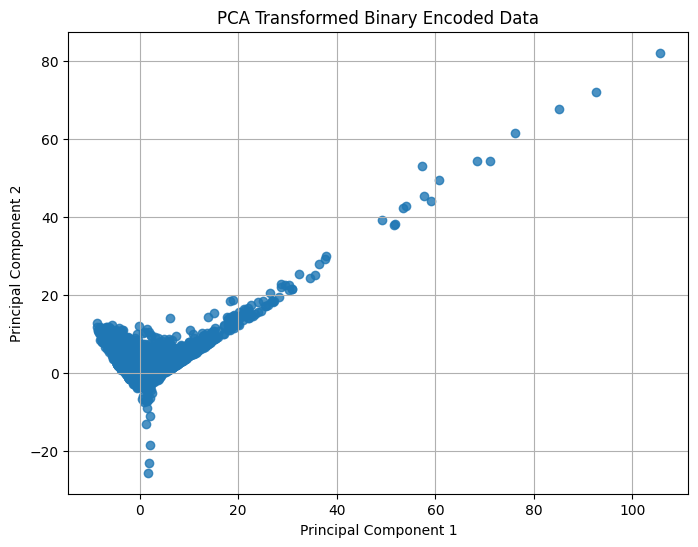

In [32]:
# Plotting PCA transformed binary encoded data

plt.figure(figsize=(8, 6))
plt.scatter(x_pca_bin[:, 0], x_pca_bin[:, 1], alpha=0.8)
plt.title('PCA Transformed Binary Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### PCA for Frequency Encoded Data

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df_freq_enc)

scaled_data_freq = scaler.transform(df_freq_enc)

pca = PCA(n_components=2)
pca.fit(scaled_data_freq)

x_pca_freq = pca.transform(scaled_data_freq)

print(scaled_data_freq.shape)
print(x_pca_freq.shape)

(100000, 20)
(100000, 2)


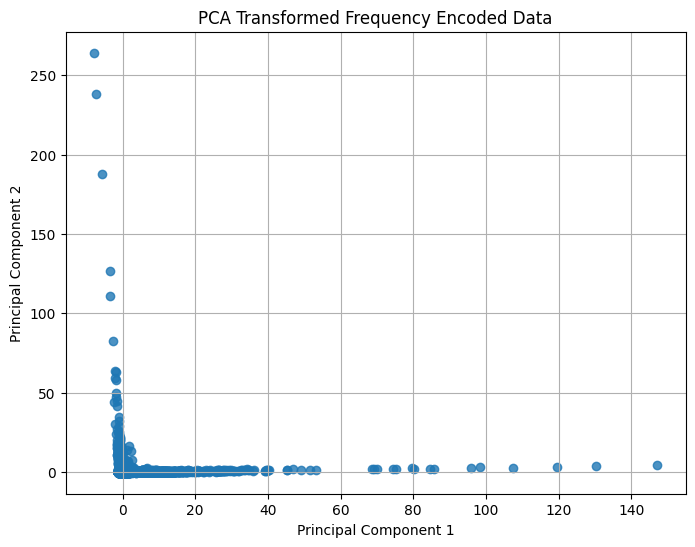

In [34]:
# Plotting PCA transformed frequency encoded data

plt.figure(figsize=(8, 6))
plt.scatter(x_pca_freq[:, 0], x_pca_freq[:, 1], alpha=0.8)
plt.title('PCA Transformed Frequency Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
    <b>Insights:</b> Here, we are proceeding with frequency encoding data rather than binary encoded one as frequency encoded has less number of attributes and tells us which data have occurred most of the time which makes our model understands better to detect the anomalies.
</div>

## Clustering
#### Frequency Encoded Data

### K-means Clustering

In [35]:
from sklearn.cluster import KMeans
wcss_freq = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(x_pca_freq)
    wcss_freq.append(kmeans.inertia_)

In [36]:
wcss_freq 

[628280.7432142168,
 456208.5119165734,
 301229.56027187454,
 200780.3076024357,
 160164.00977612828,
 120745.3647250265,
 93909.65968215383,
 75842.95126693218,
 61055.36819027073,
 53994.211334172534]

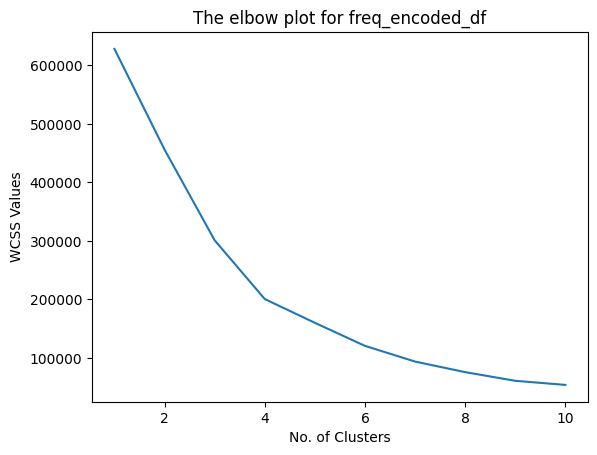

In [37]:
plt.plot(range(1,11), wcss_freq)
plt.title('The elbow plot for freq_encoded_df')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

#### Here, we can see that 4 is one of the point from where the graph is declining, so the ideal number of cluster can be 4.

In [38]:
# Applying K-means clustering
X = x_pca_freq
km = KMeans(n_clusters=4, random_state=42)
y_means = km.fit_predict(X)

In [39]:
y_means

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
X[y_means == 3,1]

array([1.31267161, 3.96817727, 4.17363545, 1.95735042, 3.13255145,
       1.76500554, 1.85313256, 2.0193501 , 1.61831246, 2.55732929,
       1.99746516, 1.20669772, 2.03536894, 1.29191924, 2.55819778,
       1.48380267, 1.14043987, 2.10979979, 1.98870618, 2.72702771,
       2.9315895 ])

### Visualization of K-means Clustering

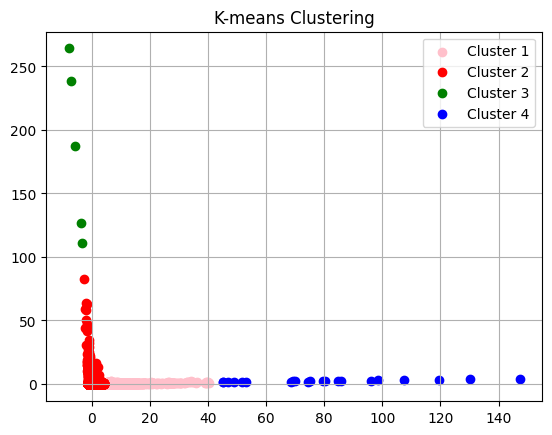

In [41]:
#Scatter Plot for k-means clustering

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='pink',label='Cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red',label='Cluster 2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Cluster 3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='blue',label='Cluster 4')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

##### Here we see that there are 4 distinct clusters formed by the data frame encoded using frequency encoding and reduced into two PCA components i.e., PCA1 and PCA2

### Scatter Plot of K-means Clusters

In [42]:
X2 = df.iloc[:, [18, 19]].values

kmeans2 = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans2 = kmeans.fit_predict(X2)

In [43]:
df.columns

Index(['Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'City of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator',
       'Number of Services', 'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount',
       'Ratio Medicare Payment to Submitted Charge'],
      dtype='object')

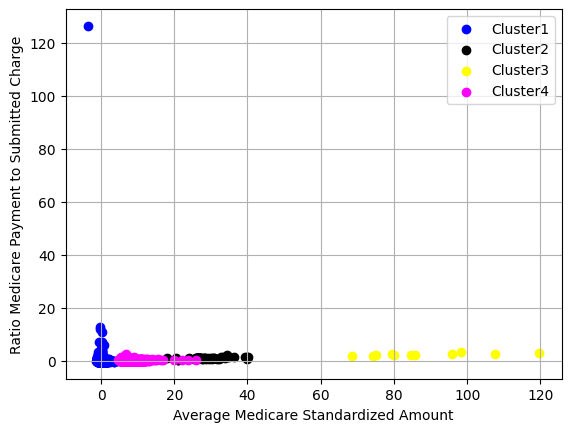

In [44]:
plt.scatter(X[y_kmeans2 == 0, 0], X[y_kmeans2 == 0, 1], c = 'blue', label = 'Cluster1')
plt.scatter(X[y_kmeans2 == 1, 0], X[y_kmeans2 == 1, 1], c = 'black', label = 'Cluster2')
plt.scatter(X[y_kmeans2 == 2, 0], X[y_kmeans2 == 2, 1], c = 'yellow', label = 'Cluster3')
plt.scatter(X[y_kmeans2 == 3, 0], X[y_kmeans2 == 3, 1], c = 'magenta', label = 'Cluster4')

plt.xlabel('Average Medicare Standardized Amount')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')
plt.legend()
plt.grid(True)
plt.show()

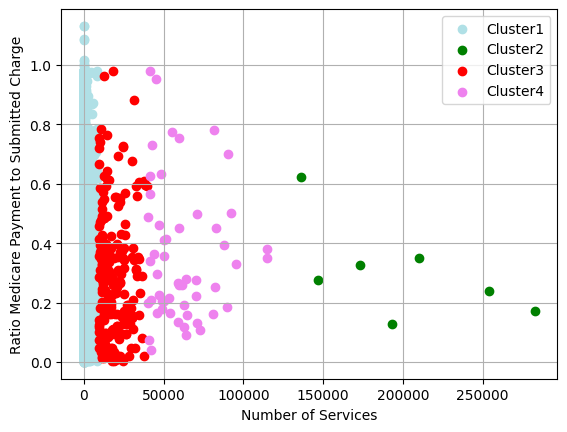

In [45]:
X3 = df.iloc[:, [12, 19]].values

kmeans3 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans3 = kmeans3.fit_predict(X3)

plt.scatter(X3[y_kmeans3 == 0, 0], X3[y_kmeans3 == 0, 1], c='powderblue', label='Cluster1')
plt.scatter(X3[y_kmeans3 == 1, 0], X3[y_kmeans3 == 1, 1], c='green', label='Cluster2')
plt.scatter(X3[y_kmeans3 == 2, 0], X3[y_kmeans3 == 2, 1], c='red', label='Cluster3')
plt.scatter(X3[y_kmeans3 == 3, 0], X3[y_kmeans3 == 3, 1], c='violet', label='Cluster4')

plt.xlabel('Number of Services')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')
plt.legend()
plt.grid(True)
plt.show()


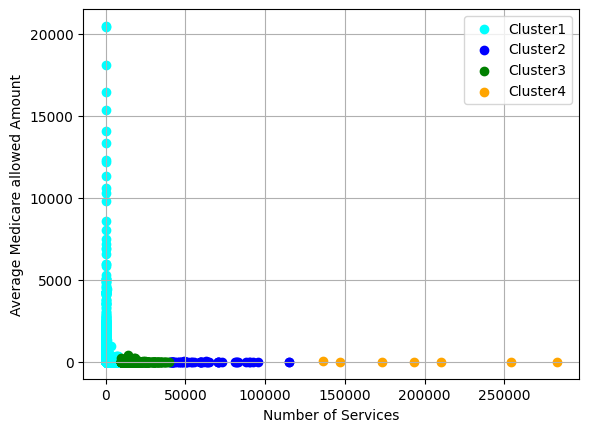

In [46]:
X4 = df.iloc[:, [12, 15]].values

kmeans4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans4 = kmeans4.fit_predict(X4)

plt.scatter(X4[y_kmeans4 == 0, 0], X4[y_kmeans4 == 0, 1], c='cyan', label='Cluster1')
plt.scatter(X4[y_kmeans4 == 1, 0], X4[y_kmeans4 == 1, 1], c='blue', label='Cluster2')
plt.scatter(X4[y_kmeans4 == 2, 0], X4[y_kmeans4 == 2, 1], c='green', label='Cluster3')
plt.scatter(X4[y_kmeans4 == 3, 0], X4[y_kmeans4 == 3, 1], c='orange', label='Cluster4')

plt.xlabel('Number of Services')
plt.ylabel('Average Medicare allowed Amount')
plt.legend()
plt.grid(True)
plt.show()